<a href="https://colab.research.google.com/github/Sonpositive/MAT421/blob/main/ModuleG_21_4_21_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**21.4 Simpson's Rule**


Simpson's Rule - pproximates the area under f(x) over two subintervals of [x_i−1,x_i] and [x_i,x_i+1] by fitting a quadratic polynomial through the points (x_i−1,f(x_i−1)),(x_i,f(x_i)), and (x_i+1,f(x_i+1)), which is a unique polynomial, and then integrating the quadratic exactly.

In [9]:

import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from scipy.integrate import cumtrapz

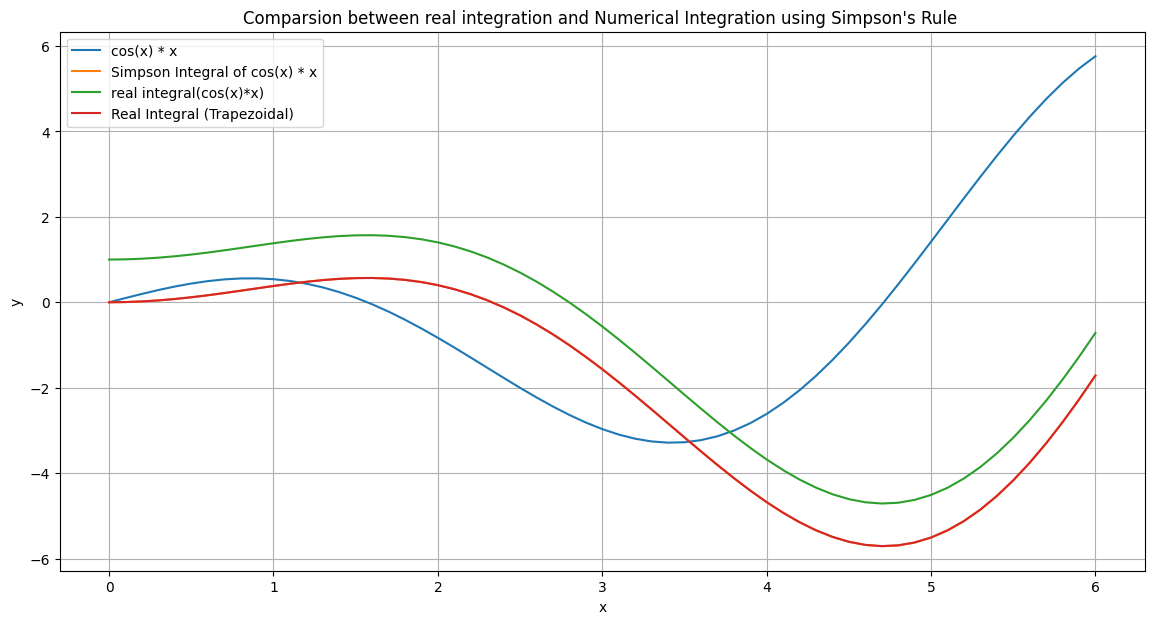

Error = 1.00


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f(x):
    return np.cos(x) * x

# Simpson's Rule Function
def simpson_rule(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    S = y[0] + y[-1] + 2 * np.sum(y[2:n:2]) + 4 * np.sum(y[1:n:2])
    return (h / 3) * S

# Parameters
a = 0  # Start of interval
b = 6  # End of interval
n = int((b - a) / 0.1)  # Number of intervals

# X and Y values
x = np.linspace(a, b, n + 1)
y = f(x)

# Numerical integration(Simpson's rule)
integrated_y = [simpson_rule(a, x_i, n) for x_i in x]


#real integration
realAnswer =  np.sin(x)*x+np.cos(x)

#using the approximated cumulative integral by cumtrapz function
realAnswer_trapz = cumtrapz(f(x), x, initial=0)




# Plotting
plt.figure(figsize=(14, 7))
plt.plot(x, y, label='cos(x) * x')
plt.plot(x, integrated_y, label='Simpson Integral of cos(x) * x')
plt.plot(x,realAnswer, label='real integral(cos(x)*x)')
plt.plot(x, realAnswer_trapz, label='Real Integral (Trapezoidal)')
plt.title('Comparsion between real integration and Numerical Integration using Simpson\'s Rule ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print('Error = %.2f' % np.mean( (integrated_y -realAnswer)**2)**.5)



In [46]:
#Use the integrate.quad function to compute ∫π0sin(x)dx. Compare your answer with the correct answer of 2.
from scipy.integrate import quad

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
